In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
os.chdir(r"C:\Users\muham\Desktop\YOLOMODEL1")
print(os.getcwd())
Coin_Type = "BNB"

C:\Users\muham\Desktop\YOLOMODEL1


In [97]:
def MajorityVoting(LabelMatrix, ProbMatrix):

    num_rows = LabelMatrix.shape[0]
    predictions = []

    for i in range(num_rows):
        labels, counts = np.unique(LabelMatrix[i], return_counts=True)
        if len(labels) == 1:
            # Only one unique label, choose it directly
            predicted_label = labels[0]
        else:
            max_count = np.max(counts)
            candidate_labels = labels[counts == max_count]
            if len(candidate_labels) == 1:
                # Only one label with the highest count
                predicted_label = candidate_labels[0]
            else:
                # Multiple labels with the same highest count, check the probabilities
                candidate_probs = [np.mean(ProbMatrix[i][LabelMatrix[i] == label]) for label in candidate_labels]
                predicted_label = candidate_labels[np.argmax(candidate_probs)]
        predictions.append(predicted_label)

    return np.array(predictions)

In [98]:
BEST_COMBINATIONS= {"BNB" : ['BNB_B_L', 'BNB_C_L', 'BNB_G_L', 'BNB_B_X', 'BNB_M_X'], #344

                    "BTC" : ['BTC_C_L', 'BTC_M_L', 'BTC_B_X', 'BTC_C_X'], #240

                    "ETH" : ['ETH_C_L', 'ETH_H_L', 'ETH_M_L', 'ETH_B_X', 'ETH_C_X', 'ETH_M_X'], #745

                    "XRP" : ['XRP_C_L', 'XRP_G_L', 'XRP_M_L', 'XRP_B_X', 'XRP_C_X', 'XRP_G_X']} #728

In [99]:
PredictedLabelsDf = pd.read_excel(f"5_Evaluation/ResultTest/{Coin_Type}PredictedLabels.xlsx", index_col = "Unnamed: 0").sort_index()
ProbsDf = pd.read_excel(f"5_Evaluation/ResultTest/{Coin_Type}Probs.xlsx", index_col = "Unnamed: 0").sort_index()
PredictedLabelsDf.head(2)

,TrueLabels,XRP_B_L,XRP_C_L,XRP_G_L,XRP_H_L,XRP_M_L,XRP_B_X,XRP_C_X,XRP_G_X,XRP_H_X,XRP_M_X
24,2,2,2,2,2,2,2,2,2,2,2
39,2,2,2,2,2,1,2,2,2,2,1


In [100]:
ProbsDf.head(2)

,XRP_B_L,XRP_C_L,XRP_G_L,XRP_H_L,XRP_M_L,XRP_B_X,XRP_C_X,XRP_G_X,XRP_H_X,XRP_M_X
24,0.832621,0.923800,0.801145,0.971381,0.833974,0.625609,0.857534,0.817392,0.862125,0.893931
39,0.837101,0.437615,0.626601,0.814619,0.887057,0.819511,0.848381,0.916561,0.918406,0.673810


In [101]:
PredictedLabelsMatrice = PredictedLabelsDf[BEST_COMBINATIONS[Coin_Type]].values
ProbsMatrice = ProbsDf[BEST_COMBINATIONS[Coin_Type]].values
MajorityVotingLabels = MajorityVoting(PredictedLabelsMatrice, ProbsMatrice)
PredictedLabelsDf["MV"] = MajorityVotingLabels
PredictedLabelsDf.head(2)

,TrueLabels,XRP_B_L,XRP_C_L,XRP_G_L,XRP_H_L,XRP_M_L,XRP_B_X,XRP_C_X,XRP_G_X,XRP_H_X,XRP_M_X,MV
24,2,2,2,2,2,2,2,2,2,2,2,2
39,2,2,2,2,2,1,2,2,2,2,1,2


In [102]:
ClosePrices = pd.read_excel(f"1_PrepareDataset/{Coin_Type}DailyWithTech.xlsx", index_col="Date")[["Close"]]
ClosePrices.head(2)

,Close
Date,
2017-12-06,0.232544
2017-12-07,0.222823


## ReturnDf - ResultDf

In [103]:
LabelIds = PredictedLabelsDf.index.values
TrueLabelIds = PredictedLabelsDf.TrueLabels.values
PredictedLabelIds = PredictedLabelsDf.MV.values
Dates = ClosePrices.index.values
Dates = np.array(Dates, dtype='datetime64[D]')
cols = ["Dates","TrueLabels", "PredictedLabels"]+[f"Day {i}" for i in range(0,16)]

BenchmarkDayDf = pd.DataFrame(index = LabelIds, columns = cols)
BenchmarkDayDf.TrueLabels = TrueLabelIds
BenchmarkDayDf.PredictedLabels = PredictedLabelIds

for labelid in LabelIds:

     windowstartid = labelid
     windowfinishid = labelid + 30 -1

     BenchmarkReturnId = windowfinishid + 15
     v = ClosePrices.Close.values[windowfinishid:BenchmarkReturnId+1]
     BenchmarkDayDf.loc[labelid, BenchmarkDayDf.columns[BenchmarkDayDf.columns.get_loc("PredictedLabels") + 1:]] = np.round(v,2)

   
DateDf = pd.read_excel(f"{Coin_Type}_Labels.xlsx")[["Date","labelId"]].dropna()
DateDf["Date"] = pd.to_datetime(DateDf["Date"]).dt.strftime('%Y-%m-%d')
DateDf = DateDf[DateDf["labelId"].isin(list(BenchmarkDayDf.index))]
Dates = DateDf["Date"].values
BenchmarkDayDf["Dates"] = Dates
BenchmarkDayDf.to_excel(f"{Coin_Type}_ResultDf.xlsx")

In [104]:
BenchmarkDayDf.head(10)

,Dates,TrueLabels,PredictedLabels,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,Day 11,Day 12,Day 13,Day 14,Day 15
24,2018-01-29,2,2,1.4,1.32,1.14,1.16,0.96,0.88,0.92,0.82,0.69,0.78,0.72,0.81,0.95,1.07,1.0,1.08
39,2018-02-13,2,2,1.08,1.03,1.14,1.15,1.14,1.2,1.12,1.14,1.09,1.02,0.94,1.0,0.95,0.94,0.96,0.95
72,2018-03-18,2,2,0.64,0.66,0.75,0.71,0.69,0.66,0.64,0.64,0.64,0.6,0.58,0.58,0.51,0.51,0.51,0.49
77,2018-03-23,2,2,0.66,0.64,0.64,0.64,0.6,0.58,0.58,0.51,0.51,0.51,0.49,0.5,0.56,0.5,0.5,0.48
83,2018-03-29,0,0,0.58,0.51,0.51,0.51,0.49,0.5,0.56,0.5,0.5,0.48,0.49,0.5,0.49,0.49,0.54,0.63
85,2018-03-31,0,0,0.51,0.51,0.49,0.5,0.56,0.5,0.5,0.48,0.49,0.5,0.49,0.49,0.54,0.63,0.64,0.63
119,2018-05-04,2,2,0.88,0.9,0.91,0.87,0.83,0.81,0.8,0.76,0.68,0.7,0.75,0.74,0.7,0.71,0.67,0.68
124,2018-05-09,2,2,0.81,0.8,0.76,0.68,0.7,0.75,0.74,0.7,0.71,0.67,0.68,0.68,0.7,0.68,0.65,0.6
146,2018-05-31,1,2,0.61,0.61,0.62,0.64,0.67,0.66,0.68,0.67,0.68,0.67,0.66,0.59,0.6,0.56,0.53,0.56
151,2018-06-05,2,2,0.66,0.68,0.67,0.68,0.67,0.66,0.59,0.6,0.56,0.53,0.56,0.54,0.53,0.53,0.54,0.55


In [105]:
BenchmarkDayDfBuy = BenchmarkDayDf[BenchmarkDayDf["PredictedLabels"] == 0]
BenchmarkDayDfBuy.head()

,Dates,TrueLabels,PredictedLabels,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,Day 11,Day 12,Day 13,Day 14,Day 15
83,2018-03-29,0,0,0.58,0.51,0.51,0.51,0.49,0.5,0.56,0.5,0.5,0.48,0.49,0.5,0.49,0.49,0.54,0.63
85,2018-03-31,0,0,0.51,0.51,0.49,0.5,0.56,0.5,0.5,0.48,0.49,0.5,0.49,0.49,0.54,0.63,0.64,0.63
225,2018-08-18,1,0,0.37,0.33,0.34,0.32,0.34,0.32,0.33,0.33,0.33,0.32,0.34,0.35,0.34,0.34,0.34,0.35
244,2018-09-06,0,0,0.28,0.3,0.29,0.28,0.28,0.27,0.26,0.27,0.28,0.28,0.28,0.28,0.27,0.32,0.33,0.45
247,2018-09-09,0,0,0.28,0.28,0.27,0.26,0.27,0.28,0.28,0.28,0.28,0.27,0.32,0.33,0.45,0.56,0.57,0.57


In [106]:
for row in BenchmarkDayDfBuy.index:
    day0price = BenchmarkDayDfBuy.loc[row, "Day 0"]

    for col in BenchmarkDayDfBuy.columns[4:]:

        currentprice = BenchmarkDayDfBuy.loc[row, col]
        pctchange = (currentprice - day0price )/day0price *100
        pctchange = round(pctchange,3)

        BenchmarkDayDfBuy.loc[row, col] = pctchange

BenchmarkDayDfBuy.head(5)

,Dates,TrueLabels,PredictedLabels,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,Day 11,Day 12,Day 13,Day 14,Day 15
83,2018-03-29,0,0,0.58,-12.069,-12.069,-12.069,-15.517,-13.793,-3.448,-13.793,-13.793,-17.241,-15.517,-13.793,-15.517,-15.517,-6.897,8.621
85,2018-03-31,0,0,0.51,0.0,-3.922,-1.961,9.804,-1.961,-1.961,-5.882,-3.922,-1.961,-3.922,-3.922,5.882,23.529,25.49,23.529
225,2018-08-18,1,0,0.37,-10.811,-8.108,-13.514,-8.108,-13.514,-10.811,-10.811,-10.811,-13.514,-8.108,-5.405,-8.108,-8.108,-8.108,-5.405
244,2018-09-06,0,0,0.28,7.143,3.571,0.0,0.0,-3.571,-7.143,-3.571,0.0,0.0,0.0,0.0,-3.571,14.286,17.857,60.714
247,2018-09-09,0,0,0.28,0.0,-3.571,-7.143,-3.571,0.0,0.0,0.0,0.0,-3.571,14.286,17.857,60.714,100.0,103.571,103.571


In [107]:
AverageReturnDf = pd.read_excel("AverageReturns.xlsx", index_col = "Days")

AverageReturnList = []
for col in BenchmarkDayDfBuy.columns[4:]:

    v = BenchmarkDayDfBuy[col].values
    v_mean = np.mean(v)
    AverageReturnList.append(v_mean)
AverageReturnDf[Coin_Type] = AverageReturnList

AverageReturnDf.to_excel("AverageReturns.xlsx")
AverageReturnDf = pd.read_excel("AverageReturns.xlsx", index_col = "Days")
AverageReturnDf.head(5)


,BNB,BTC,ETH,XRP
Days,,,,
Day 1,1.143881,1.293234,0.656402,0.613916
Day 2,2.550631,2.534484,2.634368,2.575867
Day 3,4.424976,3.519613,3.481954,4.040205
Day 4,6.216726,4.421669,4.936115,4.605892
Day 5,8.294333,5.158903,6.541655,6.564940


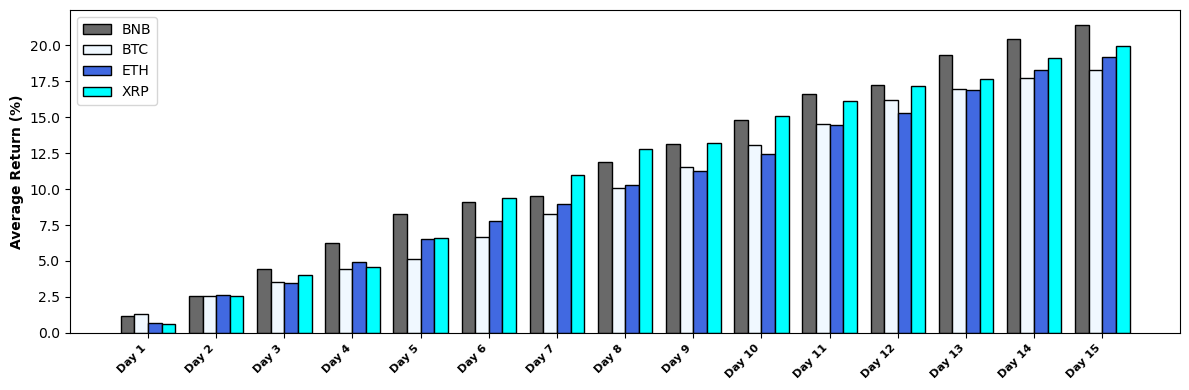

In [108]:
fig, ax = plt.subplots(figsize=(12, 4))
bar_width = 0.2
index = range(len(AverageReturnDf.index.values))
ax.bar([i - bar_width*1.5 for i in index], AverageReturnDf["BNB"], bar_width, label="BNB", color = "dimgray",edgecolor = "black" )
ax.bar([i - bar_width*0.5 for i in index], AverageReturnDf["BTC"], bar_width, label="BTC", color = "aliceblue",edgecolor = "black" )
ax.bar([i + bar_width*0.5 for i in index], AverageReturnDf["ETH"], bar_width, label="ETH", color = "royalblue",edgecolor = "black" )
ax.bar([i + bar_width*1.5 for i in index], AverageReturnDf["XRP"], bar_width, label="XRP", color = "aqua",edgecolor = "black" )
ax.set_ylabel("Average Return (%)", fontsize = 10, fontweight = "bold")
ax.set_xticks(index)
ax.set_xticklabels(AverageReturnDf.index.values, rotation=45, ha='right', fontsize = 8, fontweight =  "bold")
ax.legend()

plt.tight_layout()
plt.savefig(f"5_Evaluation/ReturnResult/AverageReturns.png", dpi = 250)

In [109]:
TransactionDf = pd.DataFrame(index = BenchmarkDayDf.Dates.values, columns = ["Capital", "Coin", "Position", "BuyPrice", 
                                                                   "SellPrice","CurrentPrice", "Day15Price", "HTime", "Label", 
                                                                   "ImageId", "DayCount"])
TransactionDf.CurrentPrice = BenchmarkDayDf["Day 0"].values
TransactionDf.Day15Price = BenchmarkDayDf["Day 15"].values
TransactionDf.Label = BenchmarkDayDf.PredictedLabels.values
TransactionDf.ImageId = BenchmarkDayDf.index.values
TransactionDf.DayCount = np.concatenate((np.diff(TransactionDf.ImageId.values),np.array([15])))    

TransactionDf

,Capital,Coin,Position,BuyPrice,SellPrice,CurrentPrice,Day15Price,HTime,Label,ImageId,DayCount
2018-01-29,NaN,NaN,NaN,NaN,NaN,1.4,1.08,NaN,2,24,15
2018-02-13,NaN,NaN,NaN,NaN,NaN,1.08,0.95,NaN,2,39,33
2018-03-18,NaN,NaN,NaN,NaN,NaN,0.64,0.49,NaN,2,72,5
2018-03-23,NaN,NaN,NaN,NaN,NaN,0.66,0.48,NaN,2,77,6
2018-03-29,NaN,NaN,NaN,NaN,NaN,0.58,0.63,NaN,0,83,2
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-07,NaN,NaN,NaN,NaN,NaN,0.54,0.54,NaN,1,2314,22
2024-05-29,NaN,NaN,NaN,NaN,NaN,0.53,0.49,NaN,2,2336,6
2024-06-04,NaN,NaN,NaN,NaN,NaN,0.52,0.49,NaN,1,2342,21
2024-06-25,NaN,NaN,NaN,NaN,NaN,0.47,0.44,NaN,2,2363,4


In [110]:
Position = "Out"
Capital = 100
Coin = 0
HoldingTime = 0
DayCount = 0
PrevDayCount = 0
BuyPrice = None
commission = 0


for row in TransactionDf.index:

    lbl = TransactionDf.loc[row, "Label"]
    CurrentPrice = TransactionDf.loc[row, "CurrentPrice"]
    Day15Price = TransactionDf.loc[row, "Day15Price"]
    PrevDayCount = DayCount
    DayCount = TransactionDf.loc[row, "DayCount"]

    if Position == "Out" and (lbl == 2 or lbl == 1):

        # Out of Market

        BuyPrice = "-"
        SellPrice = "-"
        HTime = "-"
        Position = "Out" 

        Coin = Capital / CurrentPrice

        TransactionDf.loc[row, "Capital"] = Capital
        TransactionDf.loc[row, "Coin"] = Coin
        TransactionDf.loc[row, "Position"] = Position
        TransactionDf.loc[row, "BuyPrice"] = BuyPrice
        TransactionDf.loc[row, "SellPrice"] = SellPrice
        TransactionDf.loc[row, "HTime"] = HTime
        continue

    elif (Position == "Short" or Position == "Hold (Short)" or Position == "Long-Short" or Position == "Hold (Long)-Short") and (lbl == 2 or lbl == 1):

        # Remain Short Position

        BuyPrice = "-"
        SellPrice = "-"
        HTime = "-"
        Position = "Hold (Short)" 

        Coin = Capital / CurrentPrice

        TransactionDf.loc[row, "Capital"] = Capital
        TransactionDf.loc[row, "Coin"] = Coin
        TransactionDf.loc[row, "Position"] = Position
        TransactionDf.loc[row, "BuyPrice"] = BuyPrice
        TransactionDf.loc[row, "SellPrice"] = SellPrice
        TransactionDf.loc[row, "HTime"] = HTime
        continue


    
    elif (Position == "Out" or Position == "Short" or  Position == "Hold (Short)" or Position == "Long-Short" or Position == "Hold (Long)-Short") and lbl == 0:

        if DayCount > 15:
            BuyPrice = CurrentPrice
            SellPrice = Day15Price
            HoldingTime += 15

            commission += Capital*0.001

            Capital -=Capital*0.001 #----------------------

            Coin = Capital / BuyPrice
            Capital = Coin * Day15Price

            

            Position = "Long-Short"           
            HTime = HoldingTime
            HoldingTime = 0
        
        else:
            
            # Buy Criptocurrency
            BuyPrice = CurrentPrice
            SellPrice = "-"
            HoldingTime += DayCount if DayCount <= 15 else 15

            commission += Capital*0.001
            Capital -=Capital*0.001 #----------------------


            Coin = Capital / BuyPrice

            

            Position = "Long"           
            HTime = "-"
        

        TransactionDf.loc[row, "Capital"] = Capital
        TransactionDf.loc[row, "Coin"] = Coin
        TransactionDf.loc[row, "Position"] = Position
        TransactionDf.loc[row, "BuyPrice"] = BuyPrice
        TransactionDf.loc[row, "SellPrice"] = SellPrice
        TransactionDf.loc[row, "HTime"] = HTime
        continue

    


    elif (Position == "Long" or Position == "Hold" or Position == "Hold (Long)" ) and (lbl == 0 or lbl == 1):
        


        if DayCount <= 15:
            # Remain Hold Position
            BuyPrice = "-"
            SellPrice = "-"
            HoldingTime += DayCount
            Capital = Coin*CurrentPrice
            Position = "Hold (Long)"


        else:

            BuyPrice = "-"
            SellPrice = Day15Price
            HoldingTime += 15

            Capital = Coin * Day15Price
            Coin = Capital / Day15Price

            commission += Capital*0.001
            Capital -=Capital*0.001 #----------------------

            Position = "Hold (Long)-Short"           
            HTime = HoldingTime
            HoldingTime = 0


        
        TransactionDf.loc[row, "Capital"] = Capital
        TransactionDf.loc[row, "Coin"] = Coin
        TransactionDf.loc[row, "Position"] = Position
        TransactionDf.loc[row, "BuyPrice"] = BuyPrice
        TransactionDf.loc[row, "SellPrice"] = SellPrice
        TransactionDf.loc[row, "HTime"] = HTime

        continue


    elif (Position == "Long" or Position == "Hold" or Position == "Hold (Long)" ) and lbl == 2:


        if PrevDayCount <= 15:
            SellPrice = CurrentPrice
        else:
            SellPrice = Day15Price

        # Sell Criptocurrency
        
        Capital = SellPrice * Coin

        commission += Capital*0.001
        Capital -=Capital*0.001 #----------------------
        
        Position = "Short"
        BuyPrice = "-"
        
        HTime = HoldingTime
        HoldingTime = 0

        TransactionDf.loc[row, "Capital"] = Capital
        TransactionDf.loc[row, "Coin"] = Coin
        TransactionDf.loc[row, "Position"] = Position
        TransactionDf.loc[row, "BuyPrice"] = BuyPrice
        TransactionDf.loc[row, "SellPrice"] = SellPrice
        TransactionDf.loc[row, "HTime"] = HTime
        continue


cols = TransactionDf.columns
TransactionDf["Date"] = TransactionDf.index
TransactionDf = TransactionDf[["Date"] + list(cols) ]
TransactionDf.index = range(1, len(TransactionDf)+1)
TransactionDf.to_excel(f"{Coin_Type}_TransactionDf.xlsx")





In [111]:
TransactionDf.head(2)

,Date,Capital,Coin,Position,BuyPrice,SellPrice,CurrentPrice,Day15Price,HTime,Label,ImageId,DayCount
1,2018-01-29,100,71.428571,Out,-,-,1.4,1.08,-,2,24,15
2,2018-02-13,100,92.592593,Out,-,-,1.08,0.95,-,2,39,33


In [112]:
TransactionDf.DayCount.values.mean()

9.743801652892563

In [113]:
# for row in TransactionDf.head(45).index:
#     liste = []
#     liste.append(row)
#     for col in TransactionDf.head(45).columns:

#         v = TransactionDf.loc[row, col]
#         if col == "Capital" or col == "Coin":
#             v = round(v,2)


#         liste.append(f"& {v}")
#     liste.append("\\")
#     print(liste)

In [114]:
from datetime import datetime

def calculateReturn(start_date, end_date, initial_value, final_value):
    days_difference = (end_date - start_date).days
    years_difference = days_difference / 365.25
    months_difference = days_difference / 30.44  # Ortalama bir ayın gün sayısı
    cagr = (final_value / initial_value) ** (1 / years_difference) - 1
    cmgr = (final_value / initial_value) ** (1 / months_difference) - 1
    
    return cagr * 100, cmgr * 100, years_difference, days_difference, months_difference

In [115]:
df_list = np.array_split(TransactionDf.iloc[0:,:], 4)
df_part1 = df_list[0]
df_part2 = df_list[1]
df_part3 = df_list[2]
df_part4 = df_list[3]

In [116]:
def Plot(df, id):


    fig, ax = plt.subplots(figsize=(9,4))

    startyear = int(df.Date.values[0].split("-")[0])
    startmonth = int(df.Date.values[0].split("-")[1])
    startday = int(df.Date.values[0].split("-")[2])

    finishyear = int(df.Date.values[-1].split("-")[0])
    finishmonth = int(df.Date.values[-1].split("-")[1])
    finishday = int(df.Date.values[-1].split("-")[2])

    initialcoin = round(df.Coin.values[0],2)
    finalcoin = round(df.Coin.values[-1],2)

    initialcapital = round(df.Capital.values[0],2)
    finalcapital = round(df.Capital.values[-1],2)

    InMarketDay = df[df["HTime"] != "-"].HTime.values.sum()
    NumberofBuy = len(df[df["Label"] == 0])

    cagr, monthly_return, yearcount, totalday, totalmonth = calculateReturn(datetime(startyear, startmonth, startday),
                                        datetime(finishyear, finishmonth, finishday),
                                        initialcapital, finalcapital)

    
    cagr, monthly_return, yearcount = round(cagr,2), round(monthly_return,2), round(yearcount,2)




    ax.plot(df["Date"], df["Capital"], linewidth = 2, color = "black",
                        label = f"{Coin_Type} Total Capital\n" + 
                                # f"Date Range: {df.index[0]}/{df.index[-1]} ({yearcount} year)\n" + 
                                f"Initial Capital: {initialcapital} $\n" + 
                                f"Final Capital: {finalcapital} $\n" + 
                                f"Total Day: {totalday}\n"+
                                f"Total Month: {round(totalmonth,2)}\n"+
                                f"Total Year: {yearcount}\n"+
                                f"Long Pos. Day: {InMarketDay}\n"+
                                f"Number of Buy: {NumberofBuy}\n"+
                                f"CAGR:{cagr}%\n"+
                                f"CMGR: {monthly_return}%\n"
                                )
    
    ax.legend(fontsize = 8)



    ax2 = ax.twinx()
    ax2.plot(df["Date"],df["Coin"], linewidth = 2, color = "green", 
            label = f"Total {Coin_Type} \n"+ 
                    f"Initial {Coin_Type}: {initialcoin}\n"+
                    f"Final {Coin_Type}: {finalcoin}")
    
    ax2.legend(fontsize = 8, loc = 4)


    ax.set_ylabel(f"Total {Coin_Type} Capital Equivalent", fontsize=12, fontweight="bold")
    ax2.set_ylabel(f"Total Capital {Coin_Type} Equivalent", fontsize=12, fontweight="bold")



    i = 0
    for index in df.index:
        if df.loc[index, "Position"] == "Long" or df.loc[index, "Position"] == "Hold (Long)":
            ax.scatter(df.Date.values[i], df.loc[index, "Capital"], marker = "|", s = 100, color = "Blue")
            i+=1
        elif df.loc[index, "Position"] == "Long-Short" or df.loc[index, "Position"] == "Hold (Long)-Short":
            
            ax.scatter(df.Date.values[i], df.loc[index, "Capital"], marker = "|", s = 200, color = "Black")
            i+=1
        else:
            ax.scatter(df.Date.values[i], df.loc[index, "Capital"], marker = "|", s = 100, color = "Red")
            i+=1


    if Coin_Type == "BTC":

        ticks = range(0, len(df["Date"]), 2)  
        ax.set_xticks(ticks) 
        ax.set_xticklabels(df["Date"].iloc[ticks], rotation=90, ha='center', fontsize=7, fontweight="bold")
        
    else:
        ax.set_xticks(range(len(df["Date"])))  # X ekseni için indeks ayarı
        ax.set_xticklabels(df["Date"], rotation=90, ha='center', fontsize=7, fontweight="bold")

    plt.tight_layout()
    plt.savefig(f"5_Evaluation/ReturnResult/{Coin_Type}_Combine_Strategy_{id}.png", dpi=250)



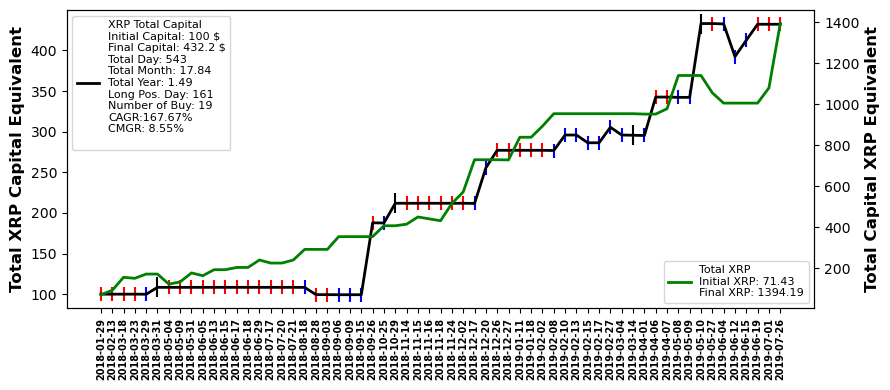

In [117]:
Plot(df_part1, 1)

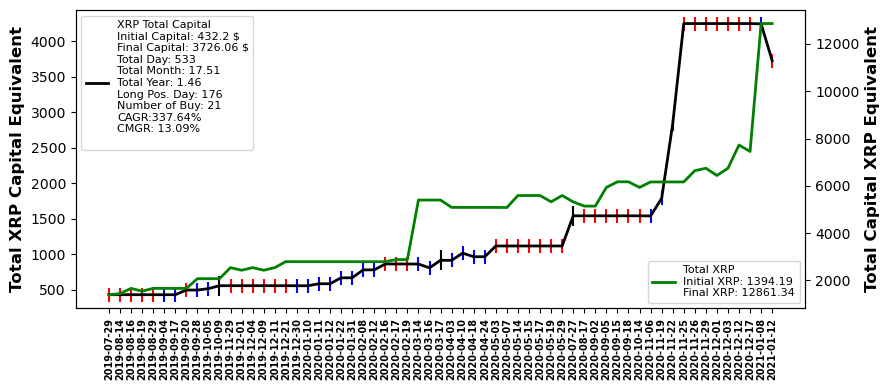

In [118]:
Plot(df_part2,2)

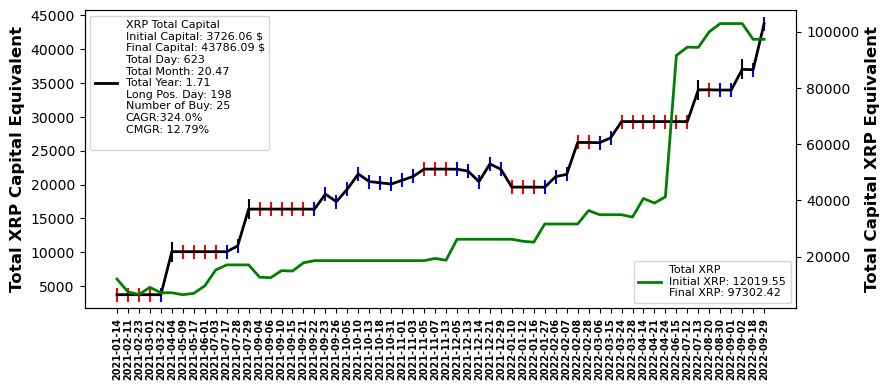

In [119]:
Plot(df_part3,3)

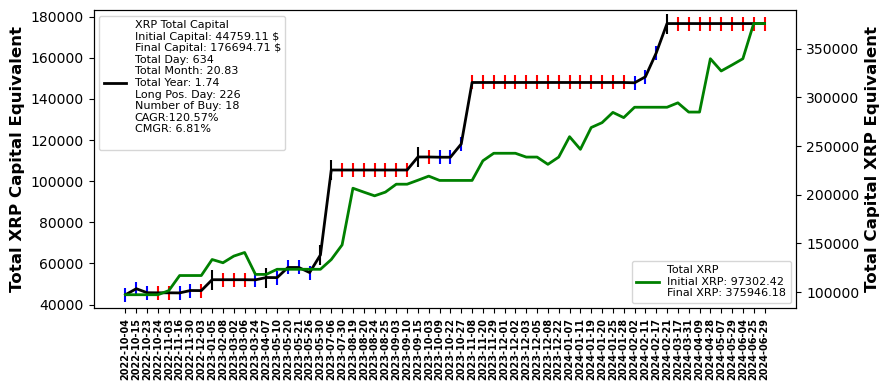

In [120]:
Plot(df_part4,4)